In [1]:
# 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time
from tqdm import tqdm_notebook
import urllib
from urllib.request import urlopen

In [2]:
df = pd.read_csv('./서울 강남구 음식점 샘플1000(아이디)(별점추가).csv',encoding='cp949',index_col=0)
df

,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
0,영업,234748466,77.35,135859.0,서울특별시 강남구 도곡동 942-9,서울특별시 강남구 강남대로58길 19 1층 (도곡동),6259.0,고래똥,2.021060e+13,U,2021-06-05 2:40,한식,202908.5511,443054.6911,한식,1035640949,4.72
1,영업,NaN,26.30,135863.0,서울특별시 강남구 삼성동 4-4,서울특별시 강남구 선릉로130길 57 지상1층 28호29호 (삼성동),6089.0,비앙57 Bien57,2.022050e+13,U,2021-12-04 23:08,패밀리레스트랑,204014.0186,446143.4751,NaN,1502239385,4.96
2,영업,NaN,75.75,135860.0,서울특별시 강남구 도곡동 944번지,서울특별시 강남구 도곡로4길 9 2층 (도곡동),6259.0,원할매 이모네 닭한마리,2.016030e+13,I,2018-08-31 23:59,한식,202897.2416,443023.6629,한식,38325046,4.34
3,영업,NaN,118.56,135884.0,서울특별시 강남구 수서동 714-6 나성빌딩,서울특별시 강남구 광평로51길 6-5 나성빌딩 1층 (수서동),6349.0,하남돼지집 수서역점,2.020110e+13,I,2020-11-19 0:23,한식,209018.8701,442913.3832,한식,37370482,4.23
4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,I,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,영업,NaN,9.45,135946.0,서울특별시 강남구 일원동 615 일원동우성7차아파트,서울특별시 강남구 개포로110길 15 지하1층 106호 (일원동 일원동우성7차아파트),6337.0,우성김밥,2.021110e+13,I,2021-11-03 0:22,분식,206857.1362,443346.2453,분식,11594474,-
996,영업,NaN,59.50,135829.0,서울특별시 강남구 논현동 217-25번지 지상1층,서울특별시 강남구 논현로124길 20 (논현동지상1층),6106.0,얌얌,2.009010e+13,I,2018-08-31 23:59,분식,202879.6558,445590.2730,분식,34098856,4.38
997,영업,NaN,62.81,135891.0,서울특별시 강남구 신사동 567-23,서울특별시 강남구 논현로159길 10 지상1층 104호 (신사동),6031.0,스미비부타동 압구정점,2.022030e+13,U,2022-03-20 2:40,한식,202355.4020,446767.1649,한식,1775893866,-
998,영업,NaN,100.15,135896.0,서울특별시 강남구 신사동 636-14,서울특별시 강남구 언주로172길 12 지상1층 (신사동),6017.0,코드로 파라다이스 압구정로데오 본점,2.022050e+13,I,2021-12-04 22:05,외국음식전문점(인도태국등),202994.8831,447266.5723,NaN,1403193658,-


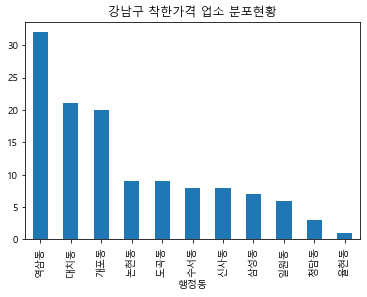

In [3]:
df = df[df['지번주소'].str.contains('역삼동')==True]
df

,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,I,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09
20,영업,02 5273194,56.88,135709.0,서울특별시 강남구 역삼동 705-1번지 빅토리아빌딩 지하1층 2호,서울특별시 강남구 테헤란로 327 (역삼동빅토리아빌딩 지하1층 2호),6150.0,빅토리아,2.013040e+13,I,2018-08-31 23:59,경양식,204091.5789,444708.1826,경양식,1451318132,4.45
24,영업,NaN,66.00,135513.0,서울특별시 강남구 역삼동 700-11 SMC빌딩,서울특별시 강남구 언주로98길 8 SMC빌딩 지상1층 (역삼동),6147.0,제이엠일구구칠위스키 JM1997WHISKY,2.022040e+13,I,2021-12-03 22:09,호프/통닭,203675.4565,444741.4122,NaN,-,-
34,영업,222766498,614.47,135931.0,서울특별시 강남구 역삼동 809-12 지상1층,서울특별시 강남구 강남대로 452 지상1층 (역삼동),6123.0,쉐이크쉑 강남점,2.021040e+13,U,2021-04-11 2:40,기타,202224.1548,444524.2744,기타,38291008,4.44
43,영업,NaN,140.71,135923.0,서울특별시 강남구 역삼동 735-25 지상1층,서울특별시 강남구 테헤란로16길 13 (역삼동지상1층),6235.0,육사공,2.020060e+13,U,2020-07-01 2:40,한식,202941.7488,444052.6019,한식,38483157,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,영업,NaN,98.12,135931.0,서울특별시 강남구 역삼동 811-7번지,서울특별시 강남구 강남대로106길 19 3층 (역삼동),6123.0,경우,2.019120e+13,U,2019-12-06 2:40,경양식,202330.9023,444556.7703,경양식,1298849328,-
984,영업,25524060,100.00,135919.0,서울특별시 강남구 역삼동 709 지상1층,서울특별시 강남구 테헤란로52길 16 지상1층 2526호 (역삼동 역삼 아이파크3차...,6213.0,도담치킨 선릉점,2.022070e+13,U,2021-12-07 0:07,통닭(치킨),204068.6968,444471.9170,NaN,1548117342,4.29
986,영업,02 566 9285,117.60,135935.0,서울특별시 강남구 역삼동 827-53번지,서울특별시 강남구 테헤란로6길 29 지상1층 (역삼동),6240.0,걸신맛집,2.017110e+13,I,2018-08-31 23:59,한식,202696.9596,443835.6304,한식,32333423,4.26
993,영업,02 5391929,181.80,135931.0,서울특별시 강남구 역삼동 812-17번지 지하1층지상1층지상2층,서울특별시 강남구 강남대로102길 21 (역삼동지하1층지상1층지상2층),6123.0,어반레빗,2.017030e+13,I,2018-08-31 23:59,경양식,202337.5852,444477.5838,경양식,727849042,4.31


In [4]:
kind = pd.read_csv('./서울시 착한가격음식점(종합).csv',encoding='cp949',index_col=0)
kind = kind[kind['행정동'] == '역삼동']
kind.식당아이디
kind.rename(columns={'업소명':'사업장명'},inplace=True)

In [5]:
# 착한가격업소 가게와 중복되는 일반음식점 제외
kind.merge(df,how='inner',on='사업장명')

,업소아이디,사업장명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,...,도로명우편번호,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점_y
0,9245,국민우동집,1,한식,서울특별시 강남구 테헤란로4길 38 (역삼동),02-555-5849,NaN,영업시간 : 24시간 좌석수 : 휴무일 : 배달 : 불가능 예약 : 카드 : 주차 ...,NaN,0,...,6241.0,2.017110e+13,I,2018-08-31 23:59,한식,202621.3322,443756.0560,한식,860263425,4.27
1,9131,대영식당,1,한식,서울특별시 강남구 강남대로62길 30 (역삼동),02-566-1373,NaN,영업시간 : 11:00~15:00/17:00~21:00 좌석수 : 휴무일 : 배달 ...,신선한 재료를 엄선하여 만드는 착한가계,0,...,6254.0,2.001100e+13,I,2018-08-31 23:59,한식,202940.3345,443174.1945,한식,18784219,-


In [6]:
kind[kind.사업장명 == '국민우동집']
kind[kind.사업장명 == '대영식당']

,업소아이디,사업장명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,...,키워드1,개수1,키워드2,개수2,키워드3,개수3,키워드4,개수4,키워드5,개수5
504,9131,대영식당,1,한식,서울특별시 강남구 강남대로62길 30 (역삼동),02-566-1373,NaN,영업시간 : 11:00~15:00/17:00~21:00 좌석수 : 휴무일 : 배달 ...,신선한 재료를 엄선하여 만드는 착한가계,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df[df.사업장명 == '국민우동집']
# df[df.사업장명 == '대영식당']

,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
82,영업,NaN,109.09,135935.0,서울특별시 강남구 역삼동 826-35번지 지상1층,서울특별시 강남구 테헤란로4길 38 (역삼동지상1층),6241.0,국민우동집,2.017110e+13,I,2018-08-31 23:59,한식,202621.3322,443756.056,한식,860263425,4.27


In [8]:
# 국민우동집,대영식당 주소동일 중복 데이터 확인
# 제거 후 일반음식점 메뉴가격 크롤링
df.drop([82,175],inplace=True)
df

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/1859553704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([82,175],inplace=True)


,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,I,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09
20,영업,02 5273194,56.88,135709.0,서울특별시 강남구 역삼동 705-1번지 빅토리아빌딩 지하1층 2호,서울특별시 강남구 테헤란로 327 (역삼동빅토리아빌딩 지하1층 2호),6150.0,빅토리아,2.013040e+13,I,2018-08-31 23:59,경양식,204091.5789,444708.1826,경양식,1451318132,4.45
24,영업,NaN,66.00,135513.0,서울특별시 강남구 역삼동 700-11 SMC빌딩,서울특별시 강남구 언주로98길 8 SMC빌딩 지상1층 (역삼동),6147.0,제이엠일구구칠위스키 JM1997WHISKY,2.022040e+13,I,2021-12-03 22:09,호프/통닭,203675.4565,444741.4122,NaN,-,-
34,영업,222766498,614.47,135931.0,서울특별시 강남구 역삼동 809-12 지상1층,서울특별시 강남구 강남대로 452 지상1층 (역삼동),6123.0,쉐이크쉑 강남점,2.021040e+13,U,2021-04-11 2:40,기타,202224.1548,444524.2744,기타,38291008,4.44
43,영업,NaN,140.71,135923.0,서울특별시 강남구 역삼동 735-25 지상1층,서울특별시 강남구 테헤란로16길 13 (역삼동지상1층),6235.0,육사공,2.020060e+13,U,2020-07-01 2:40,한식,202941.7488,444052.6019,한식,38483157,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,영업,NaN,98.12,135931.0,서울특별시 강남구 역삼동 811-7번지,서울특별시 강남구 강남대로106길 19 3층 (역삼동),6123.0,경우,2.019120e+13,U,2019-12-06 2:40,경양식,202330.9023,444556.7703,경양식,1298849328,-
984,영업,25524060,100.00,135919.0,서울특별시 강남구 역삼동 709 지상1층,서울특별시 강남구 테헤란로52길 16 지상1층 2526호 (역삼동 역삼 아이파크3차...,6213.0,도담치킨 선릉점,2.022070e+13,U,2021-12-07 0:07,통닭(치킨),204068.6968,444471.9170,NaN,1548117342,4.29
986,영업,02 566 9285,117.60,135935.0,서울특별시 강남구 역삼동 827-53번지,서울특별시 강남구 테헤란로6길 29 지상1층 (역삼동),6240.0,걸신맛집,2.017110e+13,I,2018-08-31 23:59,한식,202696.9596,443835.6304,한식,32333423,4.26
993,영업,02 5391929,181.80,135931.0,서울특별시 강남구 역삼동 812-17번지 지하1층지상1층지상2층,서울특별시 강남구 강남대로102길 21 (역삼동지하1층지상1층지상2층),6123.0,어반레빗,2.017030e+13,I,2018-08-31 23:59,경양식,202337.5852,444477.5838,경양식,727849042,4.31


In [9]:
df.reset_index(inplace=True)
df

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점
0,4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,I,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09
1,20,영업,02 5273194,56.88,135709.0,서울특별시 강남구 역삼동 705-1번지 빅토리아빌딩 지하1층 2호,서울특별시 강남구 테헤란로 327 (역삼동빅토리아빌딩 지하1층 2호),6150.0,빅토리아,2.013040e+13,I,2018-08-31 23:59,경양식,204091.5789,444708.1826,경양식,1451318132,4.45
2,24,영업,NaN,66.00,135513.0,서울특별시 강남구 역삼동 700-11 SMC빌딩,서울특별시 강남구 언주로98길 8 SMC빌딩 지상1층 (역삼동),6147.0,제이엠일구구칠위스키 JM1997WHISKY,2.022040e+13,I,2021-12-03 22:09,호프/통닭,203675.4565,444741.4122,NaN,-,-
3,34,영업,222766498,614.47,135931.0,서울특별시 강남구 역삼동 809-12 지상1층,서울특별시 강남구 강남대로 452 지상1층 (역삼동),6123.0,쉐이크쉑 강남점,2.021040e+13,U,2021-04-11 2:40,기타,202224.1548,444524.2744,기타,38291008,4.44
4,43,영업,NaN,140.71,135923.0,서울특별시 강남구 역삼동 735-25 지상1층,서울특별시 강남구 테헤란로16길 13 (역삼동지상1층),6235.0,육사공,2.020060e+13,U,2020-07-01 2:40,한식,202941.7488,444052.6019,한식,38483157,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,981,영업,NaN,98.12,135931.0,서울특별시 강남구 역삼동 811-7번지,서울특별시 강남구 강남대로106길 19 3층 (역삼동),6123.0,경우,2.019120e+13,U,2019-12-06 2:40,경양식,202330.9023,444556.7703,경양식,1298849328,-
233,984,영업,25524060,100.00,135919.0,서울특별시 강남구 역삼동 709 지상1층,서울특별시 강남구 테헤란로52길 16 지상1층 2526호 (역삼동 역삼 아이파크3차...,6213.0,도담치킨 선릉점,2.022070e+13,U,2021-12-07 0:07,통닭(치킨),204068.6968,444471.9170,NaN,1548117342,4.29
234,986,영업,02 566 9285,117.60,135935.0,서울특별시 강남구 역삼동 827-53번지,서울특별시 강남구 테헤란로6길 29 지상1층 (역삼동),6240.0,걸신맛집,2.017110e+13,I,2018-08-31 23:59,한식,202696.9596,443835.6304,한식,32333423,4.26
235,993,영업,02 5391929,181.80,135931.0,서울특별시 강남구 역삼동 812-17번지 지하1층지상1층지상2층,서울특별시 강남구 강남대로102길 21 (역삼동지하1층지상1층지상2층),6123.0,어반레빗,2.017030e+13,I,2018-08-31 23:59,경양식,202337.5852,444477.5838,경양식,727849042,4.31


In [122]:
# test
urlnum = df['업소id'][0]
url = f'https://pcmap.place.naver.com/restaurant/{urlnum}/menu/list'
url
driver = webdriver.Chrome('./driver/chromedriver')
driver.get(url)
# time.sleep(3)
html = urlopen(driver.current_url)
bs_obj = BeautifulSoup(html,'html.parser')

menu = bs_obj.find('span',{'class':'_3yfZ1'}).text
price = bs_obj.find('div',{'class':'_3qFuX'}).text
print(menu,price)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_17376/2039407968.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


한돈암돼지 생삼겹살 16,000원


In [10]:
len(df)

237

In [13]:
menu_list =[]
price_list = []
for n in tqdm_notebook(range(len(df))) :
    try :
        urlnum = df['업소id'][n]
        url = f'https://pcmap.place.naver.com/restaurant/{urlnum}/menu/list'
        
        driver = webdriver.Chrome('./driver/chromedriver')
        driver.get(url)
        # time.sleep(3)
        html = urlopen(driver.current_url)
        bs_obj = BeautifulSoup(html,'html.parser')

        menu = bs_obj.find('span',{'class':'_3yfZ1'}).text
        price = bs_obj.find('div',{'class':'_3qFuX'}).text
        
        menu_list.append(menu)
        price_list.append(price)
        
    except :
        menu_list.append("-")
        price_list.append("-")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/3585132121.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(df))) :


  0%|          | 0/237 [00:00<?, ?it/s]

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/3585132121.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [18]:
df['대표메뉴'] = menu_list
df['가격정보'] = price_list
df.head(10)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/888244645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대표메뉴'] = menu_list
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/888244645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격정보'] = price_list


,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,대표메뉴,가격정보
0,4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,I,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09,한돈암돼지 생삼겹살,"16,000원"
1,20,영업,02 5273194,56.88,135709.0,서울특별시 강남구 역삼동 705-1번지 빅토리아빌딩 지하1층 2호,서울특별시 강남구 테헤란로 327 (역삼동빅토리아빌딩 지하1층 2호),6150.0,빅토리아,2.013040e+13,I,2018-08-31 23:59,경양식,204091.5789,444708.1826,경양식,1451318132,4.45,-,-
2,24,영업,NaN,66.00,135513.0,서울특별시 강남구 역삼동 700-11 SMC빌딩,서울특별시 강남구 언주로98길 8 SMC빌딩 지상1층 (역삼동),6147.0,제이엠일구구칠위스키 JM1997WHISKY,2.022040e+13,I,2021-12-03 22:09,호프/통닭,203675.4565,444741.4122,NaN,-,-,-,-
3,34,영업,222766498,614.47,135931.0,서울특별시 강남구 역삼동 809-12 지상1층,서울특별시 강남구 강남대로 452 지상1층 (역삼동),6123.0,쉐이크쉑 강남점,2.021040e+13,U,2021-04-11 2:40,기타,202224.1548,444524.2744,기타,38291008,4.44,-,-
4,43,영업,NaN,140.71,135923.0,서울특별시 강남구 역삼동 735-25 지상1층,서울특별시 강남구 테헤란로16길 13 (역삼동지상1층),6235.0,육사공,2.020060e+13,U,2020-07-01 2:40,한식,202941.7488,444052.6019,한식,38483157,-,-,-
5,45,영업,NaN,172.82,135918.0,서울특별시 강남구 역삼동 707-34번지 한신인터밸리24빌딩,서울특별시 강남구 테헤란로 322 한신인터밸리24빌딩 지하2층 B102103호 (역삼동),6211.0,엘비스테이션(LB Station),2.019070e+13,I,2019-07-19 2:21,기타,204044.7899,444529.8404,기타,1132019353,4.21,-,-
6,46,영업,NaN,118.30,135916.0,서울특별시 강남구 역삼동 682-14번지 지상1층,서울특별시 강남구 봉은사로54길 10 지상1층 (역삼동),6143.0,이조한아름갈비,2.019050e+13,U,2019-05-05 2:40,한식,203780.3583,445235.4182,한식,33674982,4.17,채끝등심1++(120g),"43,000원"
7,50,영업,NaN,41.00,135515.0,서울특별시 강남구 역삼동 786번지,서울특별시 강남구 도곡로33길 8 1층 101호 (역삼동),6230.0,오떡 역삼점,2.015080e+13,I,2018-08-31 23:59,기타,203788.1012,443531.2308,기타,-,-,-,-
8,53,영업,02 20662463,47.88,135933.0,서울특별시 강남구 역삼동 823-40 지상4층,서울특별시 강남구 테헤란로10길 13 지상4층 (역삼동),6234.0,윙,2.021050e+13,U,2021-05-27 2:40,경양식,202818.0743,444012.6668,경양식,1520283395,-,BUFFALO HOT WING,"5,000원"
9,57,영업,NaN,140.72,135935.0,서울특별시 강남구 역삼동 827-44,서울특별시 강남구 강남대로84길 28 2층 (역삼동),6240.0,오목집 역삼점,2.020110e+13,U,2020-11-06 2:40,한식,202665.4438,443862.9802,한식,1312590881,4.16,족발(中),"38,000원"


In [20]:
df.drop(['index'],axis=1,inplace=True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_61228/932265166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],axis=1,inplace=True)


In [21]:
df.to_csv('./서울시 강남구 일반음식점(메뉴가격 추가).csv',encoding='cp949')